In [1]:
#importing the necessary libs

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the csv document and view the first 10 rows of the dataframe

date_cols = ['Admission Date',  'Discharge Date', 'Enrolment Date']
df = pd.read_csv(r'Claims Data _RSBY Gujarat cluster 2 Date Formatted.csv', parse_dates=date_cols, infer_datetime_format=True)
df.head(10)

,URN,Unique Claim no.,HOF Name,Patient Age,Patient Card Gender,Member ID,Beneficiary District Name,Hospital Name,Hospital Location/district,Admission Date,Discharge Date,Package Name,Claimed Amount,Approved Amount,Status,Enrolment Type,Enrolment Date
0,2.410000e+16,GBIC-1,MRS.DAYABHAI,12,1,2.0,Surendranagar,Pt Deendayal Upadhyay Hos,Rajkot,2016-05-24,2016-05-30,General Ward :Unspecified,4500,4500,Paid,Renewal,2016-01-04
1,2.410000e+16,GBIC-2,SARBAIBEN,80,2,1.0,Surendranagar,Pt Deendayal Upadhyay Hos,Rajkot,2016-05-24,2016-05-25,General Ward :Unspecified,750,750,Paid,Renewal,2016-01-04
2,2.420000e+16,GBIC-3,BHAVINBHAI,32,1,1.0,Anand,Urja Orthopedic Hospital,Vadodara,2016-05-27,2016-06-01,General Ward :Unspecified,3750,3750,Paid,Renewal,2016-01-04
3,2.420000e+16,GBIC-4,THAKOR PRATAPBHAI HEMTABHAI,70,1,1.0,Kheda,Sagar Surgical Hospital,Kheda,2016-05-27,2016-06-02,General Ward :Unspecified,4500,0,Denied,Renewal,2016-01-04
4,2.420000e+16,GBIC-6,THAKOR PRATAPBHAI HEMTABHAI,18,2,1.0,Kheda,Sagar Surgical Hospital,Kheda,2016-05-27,2016-06-02,General Ward :Unspecified,4500,0,Denied,Renewal,2016-01-04
5,2.420000e+16,GBIC-7,MADHABHAI,70,2,1.0,Anand,Advanced Eye Care Clinic,Vadodara,2016-06-03,2016-06-03,Cataract with foldable IOL by Phoco emulsifica...,6000,6000,Paid,Renewal,2016-01-04
6,2.420000e+16,GBIC-8,MADUKHAN,30,2,1.0,Kheda,Dhiraj Hospital,Vadodara,2016-05-20,2016-06-03,Spine - Intradural Tumour,15400,15400,Paid,Renewal,2016-01-04
7,2.410000e+16,GBIC-9,NATHABHAI,52,2,1.0,Surendranagar,shradhdha surgical hospit,Rajkot,2016-05-30,2016-06-04,Salphingo-oophorectomy,7875,6500,Paid,Renewal,2016-01-04
8,2.410000e+16,GBIC-10,NATHABHAI,52,2,1.0,Surendranagar,shradhdha surgical hospit,Rajkot,2016-05-30,2016-06-04,Cystocele - Anterior repair,5750,0,Denied,Renewal,2016-01-04
9,2.410000e+16,GBIC-11,NATHABHAI,52,2,1.0,Surendranagar,shradhdha surgical hospit,Rajkot,2016-05-30,2016-06-04,Hysterectomy - abdominal*,11500,11500,Paid,Renewal,2016-01-04


In [3]:
#show all the col type
df.dtypes

URN                                  float64
Unique Claim no.                      object
HOF Name                              object
Patient Age                            int64
Patient Card Gender                    int64
Member ID                            float64
Beneficiary District Name             object
Hospital Name                         object
Hospital Location/district            object
Admission Date                datetime64[ns]
Discharge Date                datetime64[ns]
Package Name                          object
Claimed Amount                         int64
Approved Amount                        int64
Status                                object
Enrolment Type                        object
Enrolment Date                datetime64[ns]
dtype: object

In [4]:
#view the infomation of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10446 entries, 0 to 10445
Data columns (total 17 columns):
URN                           10446 non-null float64
Unique Claim no.              10446 non-null object
HOF Name                      10446 non-null object
Patient Age                   10446 non-null int64
Patient Card Gender           10446 non-null int64
Member ID                     10443 non-null float64
Beneficiary District Name     10446 non-null object
Hospital Name                 10446 non-null object
Hospital Location/district    10446 non-null object
Admission Date                10446 non-null datetime64[ns]
Discharge Date                10446 non-null datetime64[ns]
Package Name                  10445 non-null object
Claimed Amount                10446 non-null int64
Approved Amount               10446 non-null int64
Status                        10446 non-null object
Enrolment Type                10446 non-null object
Enrolment Date                10446 non-null 

In [5]:
#function to replace categorical variables with nominal variable
def recoding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded

In [6]:
#view all unique entries in Status
df['Status'].unique()

array(['Paid', 'Denied', 'DENIED'], dtype=object)

In [7]:
#function to convert all string cells to uppercase
headers = list(df)
str_header = []
for header in headers:
   if df[header].dtype == object:
    str_header.append(header) 
    df[header] = df[header].str.upper()
    df[header] = df[header].str.strip()

In [8]:
#recoding Status from categorical to nominal
df['Status (Coded)'] = recoding(df['Status'], {'PAID':1, 'DENIED': 0})

#checking
print (pd.value_counts(df['Status']))
print (pd.value_counts(df['Status (Coded)']))

PAID      9515
DENIED     931
Name: Status, dtype: int64
1    9515
0     931
Name: Status (Coded), dtype: int64


In [9]:
#view all unique entries in Enrolment Type
df['Enrolment Type'].unique()

array(['RENEWAL', 'FRESH'], dtype=object)

In [10]:
#recoding Enrolment Type from categorical to nominal
df['Enrolment Type (Coded)'] = recoding(df['Enrolment Type'], {'RENEWAL': 1, 'FRESH': 2})

#checking
print (pd.value_counts(df['Enrolment Type']))
print (pd.value_counts(df['Enrolment Type (Coded)']))

RENEWAL    7088
FRESH      3358
Name: Enrolment Type, dtype: int64
1    7088
2    3358
Name: Enrolment Type (Coded), dtype: int64


In [11]:
#creating a dataframe of only numerical variables
num_df = df.select_dtypes(include=[np.number]).copy()

In [12]:
#creating the correlation matrix
correlation_matrix = num_df.drop(labels=['URN'], axis=1).corr(method='spearman')

In [13]:
#viewing the correlation matrix
correlation_matrix

,Patient Age,Patient Card Gender,Member ID,Claimed Amount,Approved Amount,Status (Coded),Enrolment Type (Coded)
Patient Age,1.000000,-0.184677,-0.052987,0.070428,0.081374,0.020690,-0.038228
Patient Card Gender,-0.184677,1.000000,0.094605,0.080441,0.063280,0.020809,0.052468
Member ID,-0.052987,0.094605,1.000000,0.016176,0.014249,-0.005281,0.100403
Claimed Amount,0.070428,0.080441,0.016176,1.000000,0.835342,0.068224,0.012704
Approved Amount,0.081374,0.063280,0.014249,0.835342,1.000000,0.494483,0.027994
Status (Coded),0.020690,0.020809,-0.005281,0.068224,0.494483,1.000000,0.053438
Enrolment Type (Coded),-0.038228,0.052468,0.100403,0.012704,0.027994,0.053438,1.000000


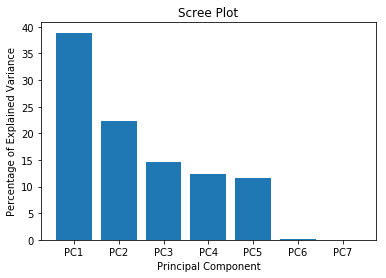

In [14]:
#determining the number of components to reduce to
i_pca = PCA(n_components=7)
i_pca.fit(correlation_matrix)
i_pca_data = i_pca.transform(correlation_matrix)

#creating a screeplot to view how much variation each PC explained
per_var = np.round(i_pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [15]:
# performing correlation PCA with 5 principal components
pca = PCA(n_components=5)
pca.fit(correlation_matrix)

header = [
    'Patient Age',
    'Patient Card Gender',
    'Member ID',
    'Claimed Amount',
    'Approved Amount',
    'Status (Coded)',
    'Enrolment Type (Coded)'
]

#printing the rank for each principal component
pc = 0
for component in pca.components_:
   
    loading_scores = pd.Series(pca.components_[pc], index=header)
    pc += 1
    sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
    print("Principal Component {}".format(pc))
    print(loading_scores[sorted_loading_scores.index.values])
    print()

Principal Component 1
Approved Amount           0.629723
Claimed Amount            0.575220
Member ID                -0.301274
Status (Coded)            0.286903
Enrolment Type (Coded)   -0.258780
Patient Card Gender      -0.171490
Patient Age               0.055813
dtype: float64

Principal Component 2
Patient Age               0.762210
Patient Card Gender      -0.576648
Claimed Amount           -0.177941
Member ID                -0.166919
Approved Amount          -0.151903
Enrolment Type (Coded)   -0.055765
Status (Coded)           -0.028365
dtype: float64

Principal Component 3
Status (Coded)            0.727912
Enrolment Type (Coded)    0.412113
Claimed Amount           -0.372997
Member ID                -0.279953
Patient Age              -0.224126
Patient Card Gender      -0.179826
Approved Amount           0.015388
dtype: float64

Principal Component 4
Enrolment Type (Coded)    0.717764
Patient Card Gender      -0.443193
Status (Coded)           -0.348892
Claimed Amount          